## Library

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, r_regression

## Load CSV

In [7]:
df = pd.read_csv('./datasets/balanced_har70.csv')
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-05-21 14:39:06.159,-0.887939,-0.148438,-0.628174,-0.994629,0.184570,-0.042480,1
1,2021-03-29 15:07:45.500,-1.577148,0.088867,-0.774902,0.114502,-0.053955,-0.212891,1
2,2021-03-29 15:06:30.260,-0.667969,-0.069336,-0.396484,-0.953613,-0.177490,-0.183594,1
3,2021-03-24 15:10:11.779,-1.383057,-0.228760,-0.405273,-1.863770,0.125488,0.687988,1
4,2021-04-16 14:53:05.704,-0.671387,0.096436,-0.241211,-0.869629,-0.064941,-0.102783,1
...,...,...,...,...,...,...,...,...
26077,2021-04-16 14:40:44.904,-0.385254,0.062256,0.922607,0.071777,0.054932,-1.078125,8
26078,2021-04-16 14:39:32.865,-0.400146,0.094482,0.904541,0.076416,0.099121,-1.073730,8
26079,2021-04-15 14:32:38.419,-0.467041,0.236084,0.861328,0.110840,-0.247803,-1.078125,8
26080,2021-05-21 14:28:52.139,-0.484375,0.078125,0.732178,0.148193,-0.069092,-0.976074,8


## Dataset Partition

In [8]:
datasets = (df.iloc[:,1:-1].values, df.iloc[:,-1].values)
X, y = datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Hyperparameter's selection with Cross validation

### RandomForestClassifier

In [9]:
level_depth = np.arange(1, 25, 1)

clf1 = HalvingRandomSearchCV(RandomForestClassifier(), {'max_depth': level_depth},
cv=10, random_state=42)

clf1.fit(X_train, y_train)
print(clf1.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=149. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomForestClassifier(max_depth=14)


In [16]:
model = RandomForestClassifier(max_depth=clf1.best_params_.get('max_depth')).fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)

print('Clasification Report')
print(report)

Clasification Report
              precision    recall  f1-score   support

           1       0.68      0.58      0.63       754
           3       0.53      0.54      0.54       720
           4       0.70      0.76      0.73       762
           5       0.66      0.57      0.61       749
           6       0.74      0.84      0.79       754
           7       1.00      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.76      5217
   macro avg       0.76      0.76      0.76      5217
weighted avg       0.76      0.76      0.76      5217



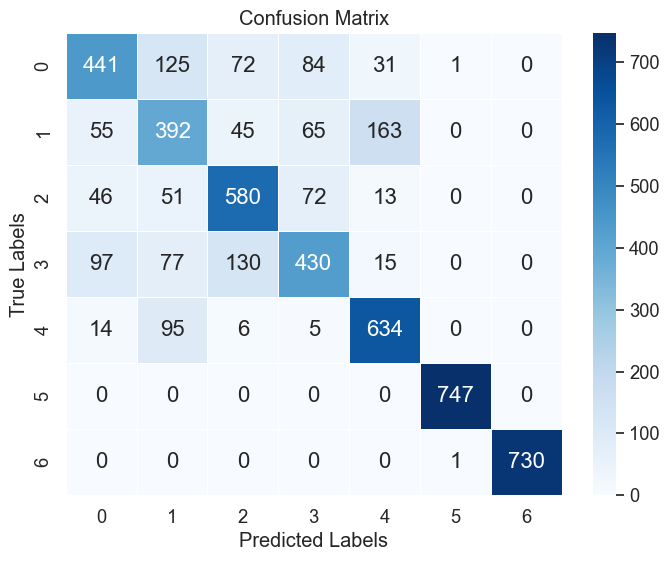

In [17]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### Kneighbors

In [18]:
neighbors = np.arange(1, 20, 1)

clf2 = HalvingRandomSearchCV(KNeighborsClassifier(), {'n_neighbors': neighbors}, 
cv=10, random_state=0)
clf2.fit(X_train, y_train)
print(clf2.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 19 is smaller than n_iter=149. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsClassifier(n_neighbors=1)


In [20]:
model1 = KNeighborsClassifier(n_neighbors=clf2.best_params_.get('n_neighbors')).fit(X_train, y_train)

y_pred2 = model1.predict(X_test)

report2 = classification_report(y_test, y_pred2)

print('Clasification Report')
print(report2)

Clasification Report
              precision    recall  f1-score   support

           1       0.64      0.54      0.58       754
           3       0.52      0.53      0.53       720
           4       0.72      0.77      0.74       762
           5       0.67      0.62      0.64       749
           6       0.72      0.80      0.76       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.75      5217
   macro avg       0.75      0.75      0.75      5217
weighted avg       0.75      0.75      0.75      5217



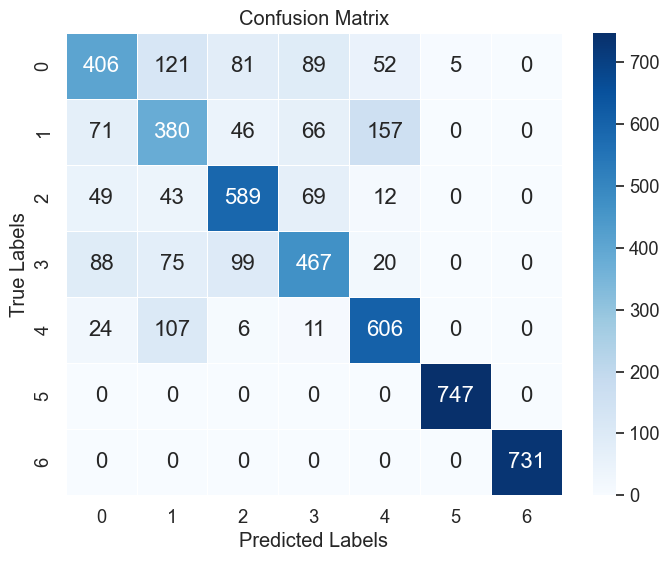

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred2)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### ExtraTreesClassifier

In [25]:
level_depth = np.arange(1, 50, 1)

clf3 = HalvingRandomSearchCV(ExtraTreesClassifier(random_state=0), {'max_depth': level_depth},
cv=10, random_state=42)
clf3.fit(X_train, y_train)
print(clf3.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 49 is smaller than n_iter=149. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreesClassifier(max_depth=25, random_state=0)


In [27]:
model2 = ExtraTreesClassifier(max_depth=clf3.best_params_.get('max_depth'), random_state=0).fit(X_train, y_train)

y_pred3 = model2.predict(X_test)
report3 = classification_report(y_test, y_pred3)

print('Clasification Report')
print(report3)

Clasification Report
              precision    recall  f1-score   support

           1       0.71      0.57      0.63       754
           3       0.53      0.55      0.54       720
           4       0.72      0.79      0.76       762
           5       0.68      0.61      0.65       749
           6       0.75      0.86      0.80       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.77      5217
   macro avg       0.77      0.77      0.77      5217
weighted avg       0.77      0.77      0.77      5217



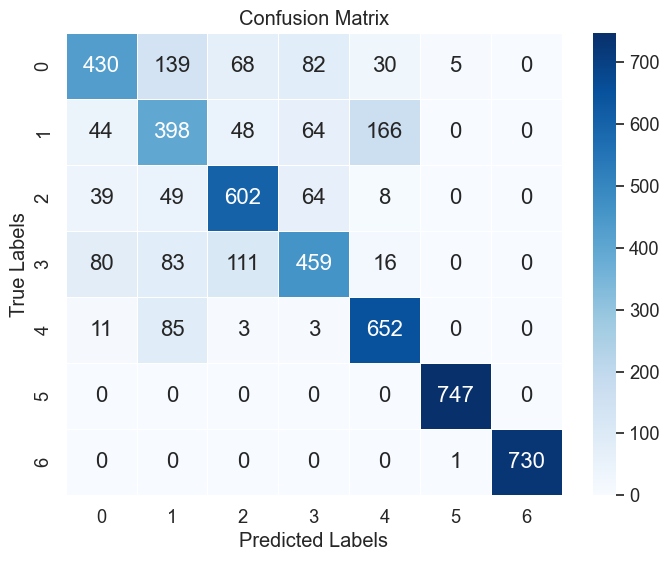

In [28]:
conf_matrix = confusion_matrix(y_test, y_pred3)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

###  BaggingClassifier

In [29]:
n_estimators = np.arange(1, 20, 1)

clf4 = HalvingRandomSearchCV(BaggingClassifier(), {'n_estimators': n_estimators},
cv=10, random_state=0)
clf4.fit(X_train, y_train)
print(clf4.best_estimator_)


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 19 is smaller than n_iter=149. Running 19 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


BaggingClassifier(n_estimators=18)


In [31]:
model3 = BaggingClassifier(n_estimators=clf4.best_params_.get('n_estimators')).fit(X_train, y_train)

y_pred4 = model3.predict(X_test)
report4 = classification_report(y_test, y_pred4)

print('Clasification Report')
print(report4)

Clasification Report
              precision    recall  f1-score   support

           1       0.62      0.59      0.61       754
           3       0.52      0.55      0.53       720
           4       0.72      0.76      0.74       762
           5       0.66      0.60      0.63       749
           6       0.77      0.79      0.78       754
           7       0.99      1.00      0.99       747
           8       1.00      1.00      1.00       731

    accuracy                           0.75      5217
   macro avg       0.75      0.75      0.75      5217
weighted avg       0.75      0.75      0.75      5217



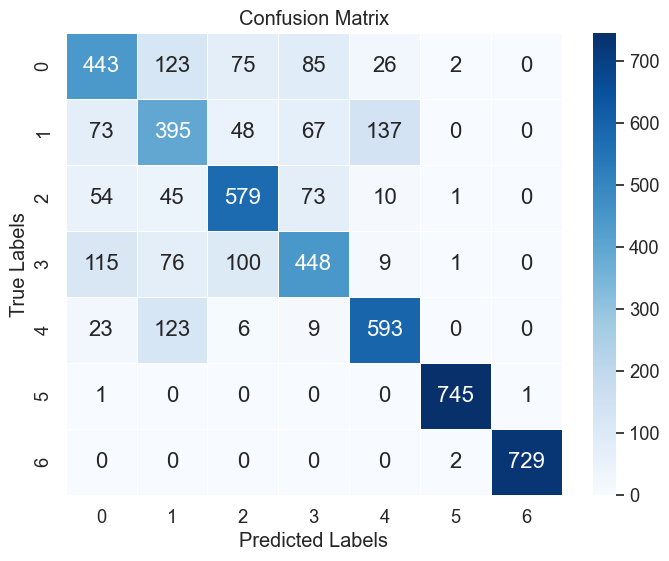

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred4)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

### MLPClassifier

In [33]:
num_layers = np.arange(1, 10, 2)
num_neurons = np.arange(5, 50, 10)
num_neurons

layers = []
for l in num_layers:
    for n in num_neurons:
        layers.append(l*[n])
    
clf5 = HalvingRandomSearchCV(MLPClassifier(max_iter=10000), {'hidden_layer_sizes': layers},
cv = 10, random_state = 0)
clf5.fit(X_train, y_train)
print(clf5.best_estimator_)

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 25 is smaller than n_iter=149. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[45, 45, 45], max_iter=10000)


In [35]:
model4 = MLPClassifier(hidden_layer_sizes=clf5.best_params_.get('hidden_layer_sizes'), max_iter=10000).fit(X_train, y_train)

y_pred5 = model4.predict(X_test)
report5 = classification_report(y_test, y_pred5)

print('Clasification Report')
print(report5)

Clasification Report
              precision    recall  f1-score   support

           1       0.68      0.54      0.60       754
           3       0.46      0.60      0.52       720
           4       0.62      0.80      0.70       762
           5       0.64      0.50      0.56       749
           6       0.78      0.64      0.71       754
           7       0.99      1.00      1.00       747
           8       1.00      1.00      1.00       731

    accuracy                           0.72      5217
   macro avg       0.74      0.73      0.73      5217
weighted avg       0.74      0.72      0.73      5217



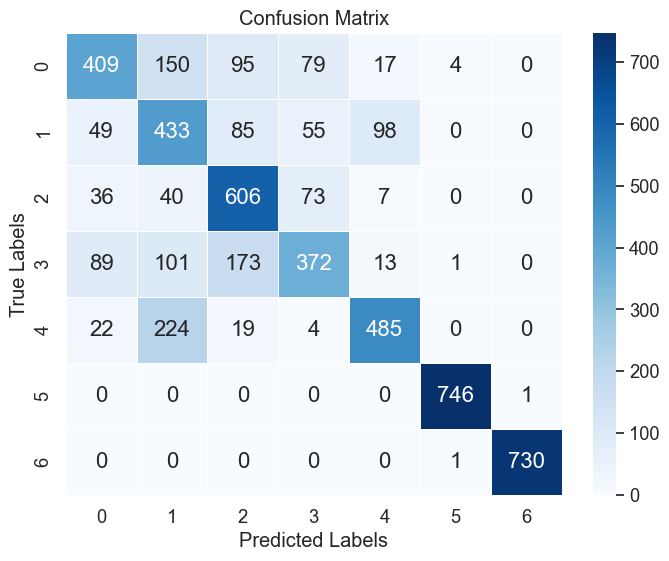

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred5)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for clarity
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 16})

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

## Feature's selection with Cross validation for 

In [46]:
feats_f = np.arange(1, 7, 1)

recall_cv_fe = []
accuracy_cv_fe = []
precision_cv_fe = []
f1_cv_fe = []

for feat in feats_f:
    print('Feature ', feat, ':')
    
    accuracy_cv = []
    recall_cv = []
    precision_cv = []
    f1_cv = []

    kf = KFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(X):
    
        # Training phase
        x_train = X[train_index]
        y_train = y[train_index]     
        
        fselection_cv = SelectKBest(r_regression, k = feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)

        regr_cv = ExtraTreesClassifier(max_depth=clf3.best_params_.get('max_depth'), class_weight='balanced')
        regr_cv.fit(x_train, y_train)

        # Test phase
        x_test = fselection_cv.transform(X[test_index])
        y_test = y[test_index]
        y_pred = regr_cv.predict(x_test)
    
        acc_i = accuracy_score(y_test, y_pred)
        accuracy_cv.append(acc_i)

        rec_i = recall_score(y_test, y_pred, average='macro')
        recall_cv.append(rec_i)

        prec_i = precision_score(y_test, y_pred, average='macro')
        precision_cv.append(prec_i)       
    
        f1_i = f1_score(y_test, y_pred, average='macro')
        f1_cv.append(f1_i)

    acc = np.average(accuracy_cv)
    accuracy_cv_fe.append(acc)
    
    rec = np.average(recall_cv)
    recall_cv_fe.append(rec)
    
    pre = np.average(precision_cv)
    precision_cv_fe.append(pre)

    f1 = np.average(f1_cv)
    f1_cv_fe.append(f1)
    
    print('Acc: ', acc, '  REC: ', rec,'  Prec: ', pre, ' F1: ', f1)

opt_index1 = np.argmax(accuracy_cv_fe)
opt_features = feats_f[opt_index1]
print("Optimal number of features: ", opt_features)

Feature  1 :
Acc:  0.4669505207139002   REC:  0.4667203294592929   Prec:  0.4543772390213177  F1:  0.4559957937598015
Feature  2 :
Acc:  0.5947009893328912   REC:  0.5947836696127625   Prec:  0.5890265118744166  F1:  0.5895735754515661
Feature  3 :
Acc:  0.6630238081378599   REC:  0.6630790833718486   Prec:  0.660010424697422  F1:  0.6582203488552528
Feature  4 :
Acc:  0.69557538709575   REC:  0.6956598571087059   Prec:  0.6920894439643483  F1:  0.691511751412704
Feature  5 :
Acc:  0.7279347411306359   REC:  0.7278711120186371   Prec:  0.7249391151079985  F1:  0.7238729024498602
Feature  6 :
Acc:  0.7708766085626155   REC:  0.7709414532441079   Prec:  0.7704148282738456  F1:  0.7689082706049603
Optimal number of features:  6
